In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
fname='../data/Infectious'
with open(fname) as f:
    content = f.readlines()
content = [x.strip() for x in content] 
# you may also want to remove whitespace characters like `\n` at the end of each line


In [23]:
D=np.array([np.array(x.split()[2:]).astype(int) for x in content])

In [24]:
D=np.squeeze(D)

In [111]:
D=pd.read_csv('../data/Immune',engine='python',header=None,sep=" ",names=np.arange(1000))

In [112]:
E=D.dropna(how='all',axis=1)

In [113]:
E=E.fillna(0)

In [114]:
E=E.loc[:,:500]

In [115]:
E[0].value_counts()

MNEG26081    685
MNEG26125    681
FNEG26125    646
FNEG26081    617
MNEG47157    595
            ... 
FPOS13211      1
MPOS48121      1
MNEG28135      1
MNEG33003      1
FNEG13221      1
Name: 0, Length: 2680, dtype: int64

In [116]:
E['gender'] = [x[0] for x in E[0].values]

In [117]:
E['label'] = [x[1:4] for x in E[0].values]

In [118]:
D=E.iloc[:,2:]
D=D.sample(10000)

In [119]:
y_=D.label.values

In [120]:
y=np.array([i=='POS' for i in y_]).astype(int)

In [121]:
y.min()

0

In [122]:
X=D.drop(['gender','label'],axis=1).values

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.spatial import ConvexHull
%matplotlib inline

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [125]:
def getAuc(X,y,test_size=0.5,max_depth=None,n_estimators=100,minsplit=4,FPR=[],TPR=[]):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    CLASSIFIERS=[DecisionTreeClassifier(max_depth=max_depth, min_samples_split=minsplit),
                RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=minsplit),
                #AdaBoostClassifier(n_estimators=500),
                #GradientBoostingClassifier(n_estimators=100,max_depth=max_depth)
                ]

    for clf in CLASSIFIERS:
        clf.fit(X_train,y_train)
        y_pred=clf.predict_proba(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
        auc=metrics.auc(fpr, tpr)
        print('#',auc)

        #plt.plot(fpr,tpr)

        FPR=np.append(FPR,fpr)
        TPR=np.append(TPR,tpr)
    points=np.array([[a[0],a[1]] for a in zip(FPR,TPR)])
    hull = ConvexHull(points)
    x=np.argsort(points[hull.vertices,:][:,0])
    auc=metrics.auc(points[hull.vertices,:][x,0],points[hull.vertices,:][x,1])
    return auc

In [126]:
A=[getAuc(X,y,minsplit=3,n_estimators=20) for i in range(20)]

# 0.5599156986823856
# 0.6020157911465557
# 0.6623071255201107
# 0.5824426316678963
# 0.6436217791499553
# 0.5946211649677039
# 0.5594767496980614
# 0.6231538464709253
# 0.6145099526378921
# 0.5699941054991983
# 0.5909711087020145
# 0.6348047601185495
# 0.559178530560043
# 0.6112113792407108
# 0.5903464929994615
# 0.5550725614413443
# 0.5974955444728998
# 0.6091098680564915
# 0.5467137679531533
# 0.6208140510101691
# 0.6043810187057256
# 0.5470808080808082
# 0.6304646464646464
# 0.6059555555555556
# 0.560510063274098
# 0.6120149266289714
# 0.5921134558427572
# 0.5423690673886044
# 0.6155420114709945
# 0.637667634212032
# 0.5254998844197873
# 0.5913264274156264
# 0.5980553629218678
# 0.5335727125981363
# 0.6476768288208966
# 0.5783990021278157
# 0.5660815173527038
# 0.6503778707168538
# 0.7006498092303177
# 0.5370583877115203
# 0.59518658948728
# 0.5825221177579943
# 0.5731660064550967
# 0.621263896388691
# 0.6000127782884513
# 0.5473245311626342
# 0.598609353078187
# 0.5835331487827552

In [109]:
import seaborn as sns

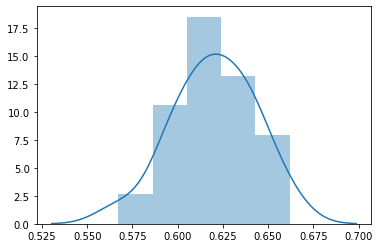

In [110]:
sns.distplot(A)

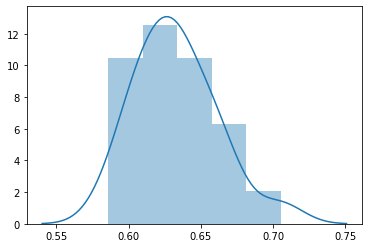

In [127]:
sns.distplot(A)

In [ ]:
# Quiz: Compute the sensitivity at 95% specificity. 
# compute the PPV at 95% specificity